In [2]:
# Libraries

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
import os
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from scipy.cluster.hierarchy import ward, dendrogram
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans

In [4]:
filepath = 'Docs\\Raw_Texts\\'
documents = []
for filename in os.listdir('Docs\Raw_Texts'):
    documents.append(filepath + filename)
documents[:10]

['Docs\\Raw_Texts\\Argentina_BuenosAires_092818.pdf.txt',
 'Docs\\Raw_Texts\\Argentina_SantaFe_062917.pdf.txt',
 'Docs\\Raw_Texts\\Australia_Melbourne_060116.pdf.txt',
 'Docs\\Raw_Texts\\Australia_Sydney_072418.pdf.txt',
 'Docs\\Raw_Texts\\Brazil_RioDeJaneiro_050316.pdf.txt',
 'Docs\\Raw_Texts\\Canada_Calgary_061719.pdf.txt',
 'Docs\\Raw_Texts\\Canada_Montreal_061818.pdf.txt',
 'Docs\\Raw_Texts\\Canada_Toronto_060419.pdf.txt',
 'Docs\\Raw_Texts\\Canada_Vancouver_062019.pdf.txt',
 'Docs\\Raw_Texts\\Chile_Santiago_032817.pdf.txt']

In [5]:
vectorizer = CountVectorizer(input='filename', stop_words = 'english', lowercase=True)
dtm = vectorizer.fit_transform(documents)

In [9]:
vocab = vectorizer.get_feature_names()

In [11]:
dtm = dtm.toarray()
vocab = np.array(vocab)

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [12]:
edist = euclidean_distances(dtm)

In [14]:
edist
np.round(edist, 2)

array([[   0.  , 1016.51, 1197.64, ..., 1235.65, 1051.53, 1075.79],
       [1016.51,    0.  , 1066.39, ..., 1119.62,  916.65,  888.93],
       [1197.64, 1066.39,    0.  , ..., 1101.51,  999.89,  936.72],
       ...,
       [1235.65, 1119.62, 1101.51, ...,    0.  , 1066.8 ,  974.51],
       [1051.53,  916.65,  999.89, ..., 1066.8 ,    0.  ,  719.25],
       [1075.79,  888.93,  936.72, ...,  974.51,  719.25,    0.  ]])

In [15]:
cosim = cosine_similarity(dtm)
cosimdist = 1 - cosine_similarity(dtm)
np.round(cosimdist,2)

array([[-0.  ,  0.39,  0.54, ...,  0.58,  0.46,  0.49],
       [ 0.39,  0.  ,  0.56, ...,  0.62,  0.52,  0.52],
       [ 0.54,  0.56,  0.  , ...,  0.58,  0.58,  0.53],
       ...,
       [ 0.58,  0.62,  0.58, ..., -0.  ,  0.67,  0.59],
       [ 0.46,  0.52,  0.58, ...,  0.67,  0.  ,  0.46],
       [ 0.49,  0.52,  0.53, ...,  0.59,  0.46,  0.  ]])

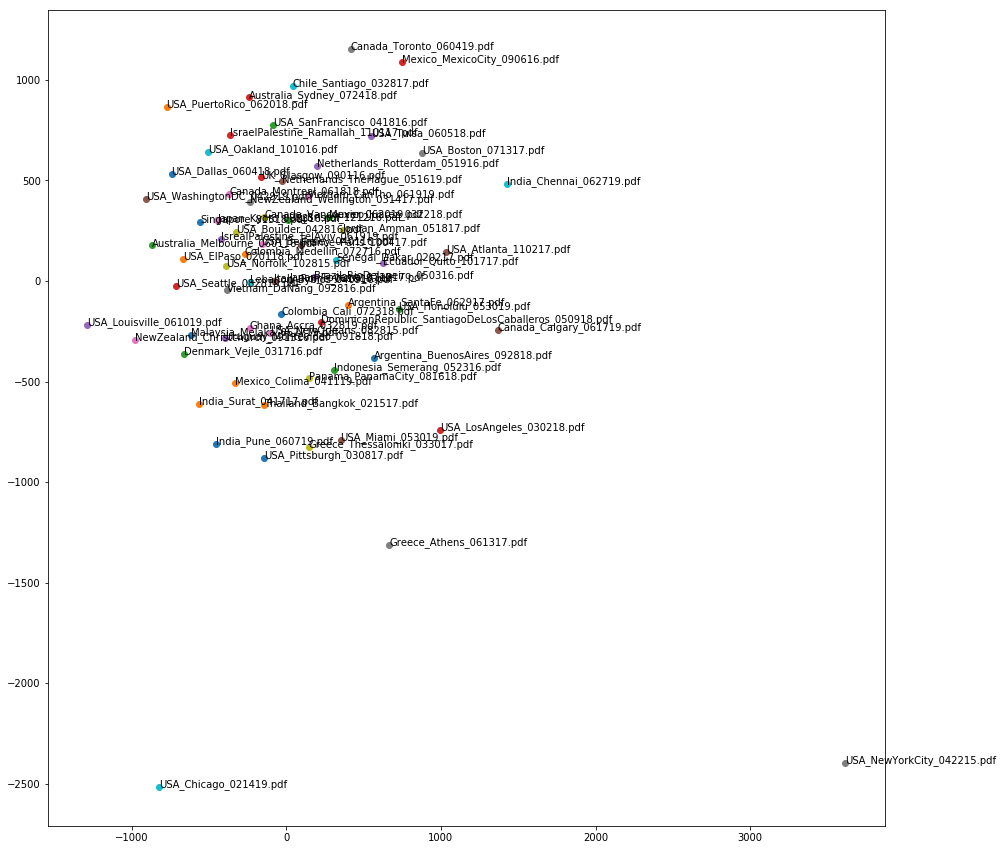

In [35]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(edist)
xs, ys = pos[:, 0], pos[:, 1]
names = [os.path.basename(fn).replace('.txt', '') for fn in documents]
for x, y, names in zip(xs, ys, names):
    plt.scatter(x,y)
    plt.text(x, y, names)
plt.rcParams["figure.figsize"] = [10,10]
plt.show()

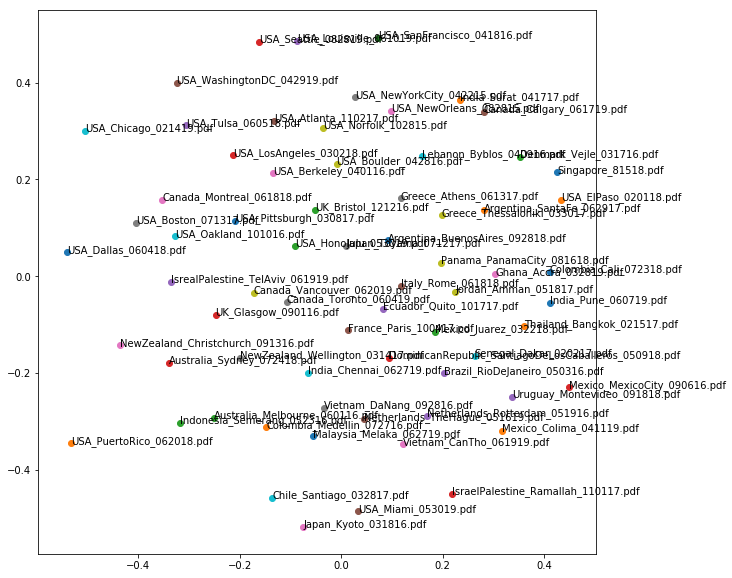

In [36]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(cosimdist)
xs, ys = pos[:, 0], pos[:, 1]
names = [os.path.basename(fn).replace('.txt', '') for fn in documents]
for x, y, names in zip(xs, ys, names):
    plt.scatter(x,y)
    plt.text(x, y, names)
plt.rcParams["figure.figsize"] = [15,15]
plt.show()

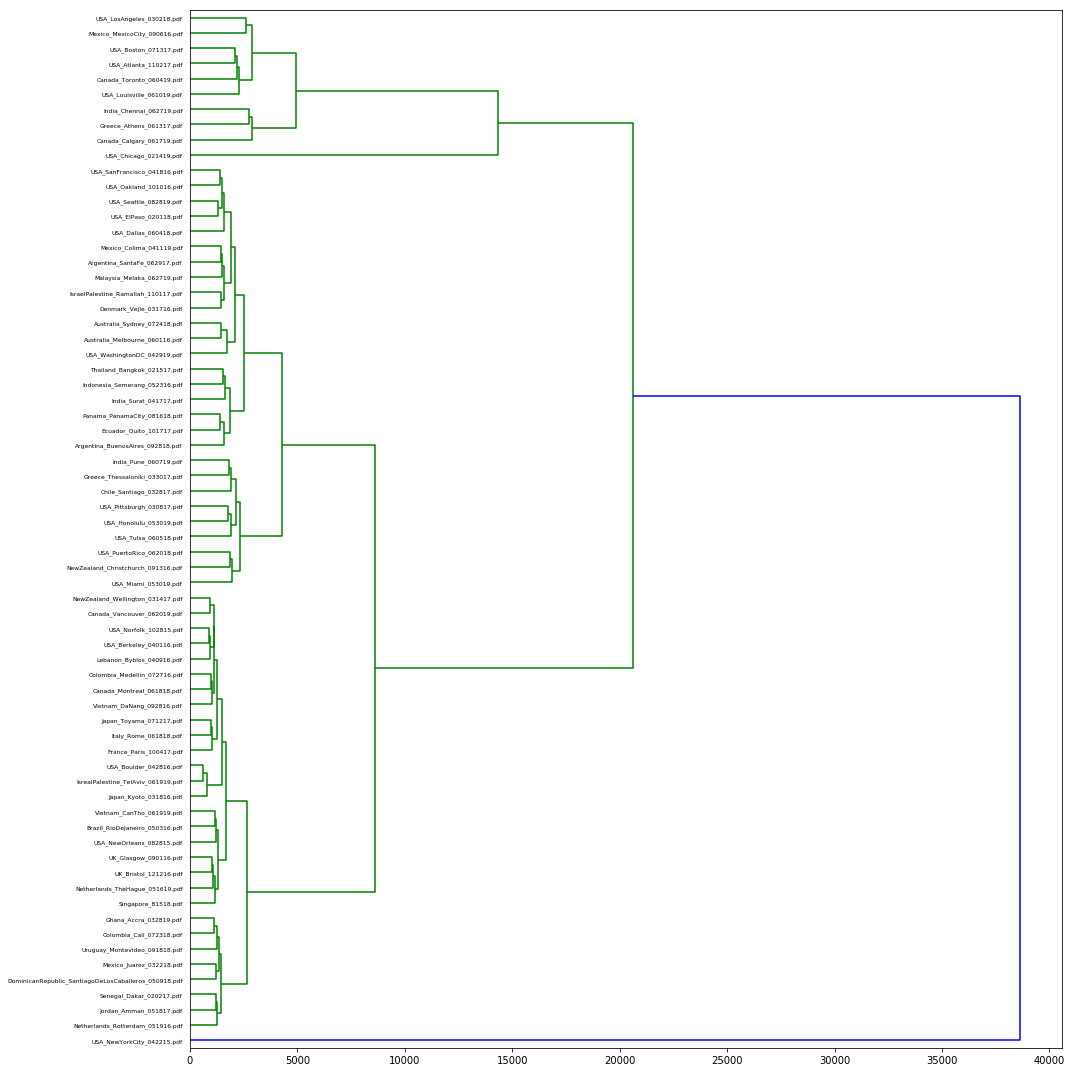

In [37]:
edist_comp = pdist(edist)
linkmat = ward(edist_comp)
names = [os.path.basename(fn).replace('.txt', '') for fn in documents]
dendrogram(linkmat, orientation="right", labels=names)
plt.tight_layout() #fixes margins
plt.rcParams["figure.figsize"] = [15,15]
plt.show()

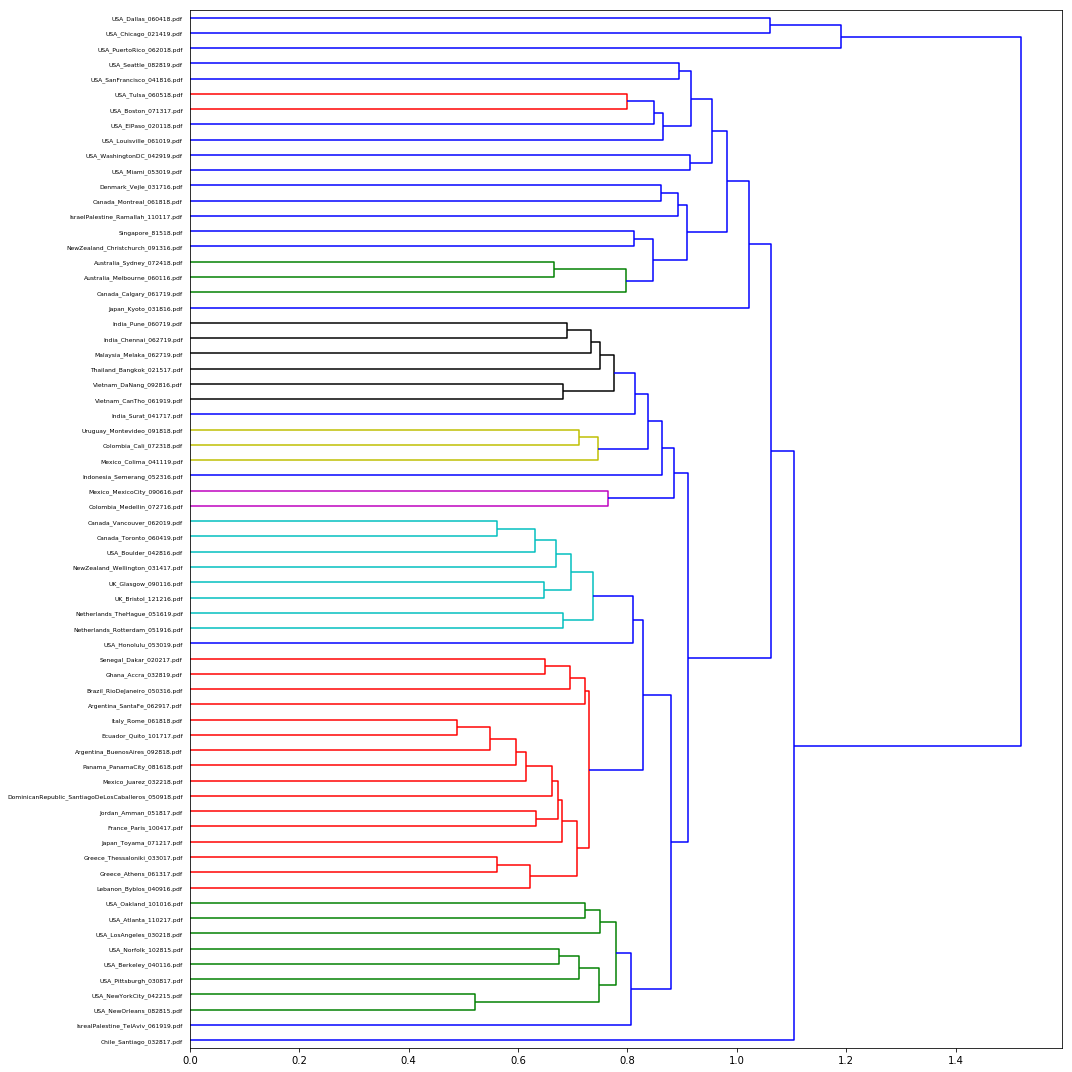

In [59]:
cosimdist_comp = pdist(cosimdist)
linkmat = hierarchy.linkage(cosimdist_comp, "average", metric="cosine")
dendrogram(linkmat, orientation="right", labels=names, color_threshold=.8)
plt.tight_layout()
plt.rcParams["figure.figsize"] = [15,15]
plt.show()